# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
geo_data_0 = pd.read_csv('/geo_data_0.csv')
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_0.head()

In [ ]:
print(f'{geo_data_0.id.duplicated().sum()=}')
geo_data_0[geo_data_0.id.duplicated()]

в DataFrame по 1-му региону отсутствуют пропуски, но имеются строки-дубликаты, их число не велико, но их можно удалить

In [5]:
geo_data_0 = geo_data_0.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)

In [6]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_1.head()

In [ ]:
print(f'{geo_data_1.id.duplicated().sum()=}')
geo_data_1[geo_data_1.id.duplicated()]

In [9]:
geo_data_1 = geo_data_1.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)

In [10]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_2.head()

In [ ]:
print(f'{geo_data_2.id.duplicated().sum()=}')
geo_data_2[geo_data_2.id.duplicated()]

In [13]:
geo_data_2 = geo_data_2.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)

в DataFrame по 2 и 3 регионам также отсутствуют пропуски, и имеются строки-дубликаты, которые мы удалили

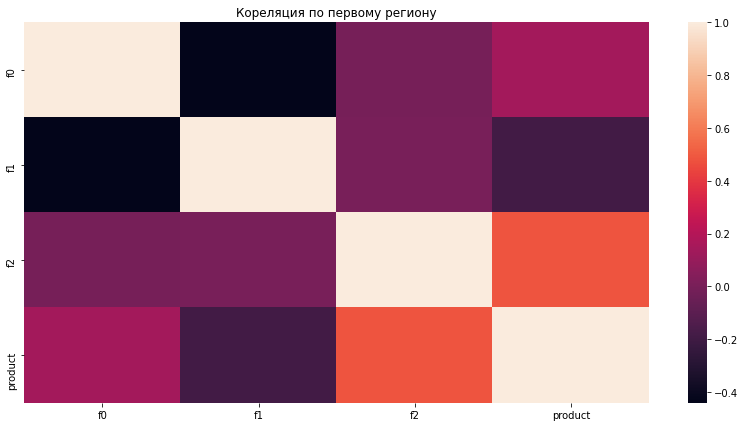

In [49]:
plt.subplots(figsize=(14, 7))
sns.heatmap(geo_data_0.corr())
plt.title('Кореляция по первому региону')
plt.show()

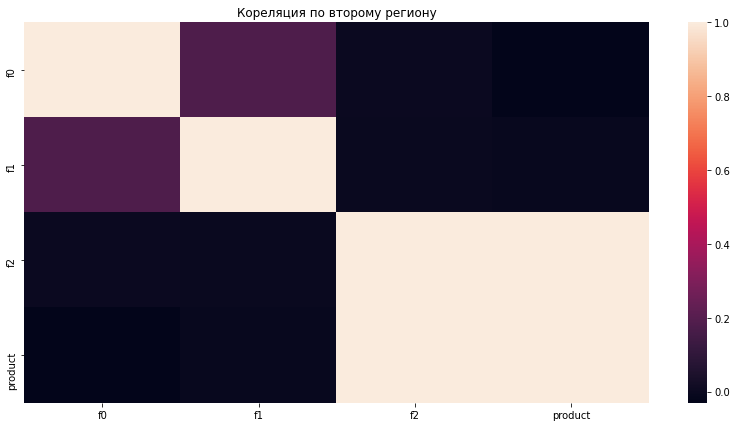

In [48]:
plt.subplots(figsize=(14, 7))
sns.heatmap(geo_data_1.corr())
plt.title('Кореляция по второму региону')
plt.show()

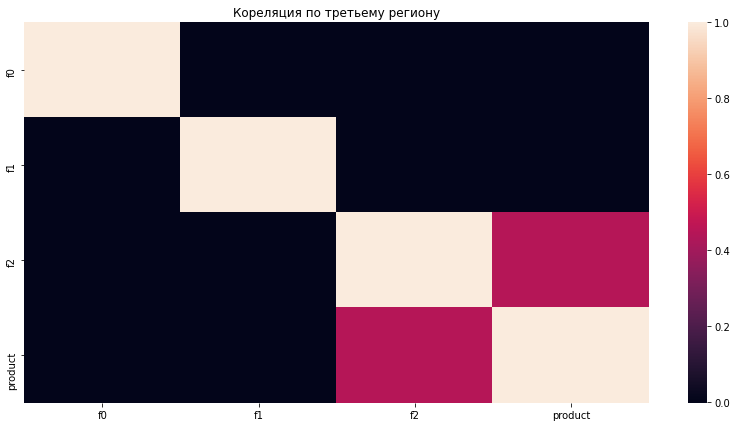

In [47]:
plt.subplots(figsize=(14, 7))
sns.heatmap(geo_data_2.corr())
plt.title('Кореляция по третьему региону')
plt.show()

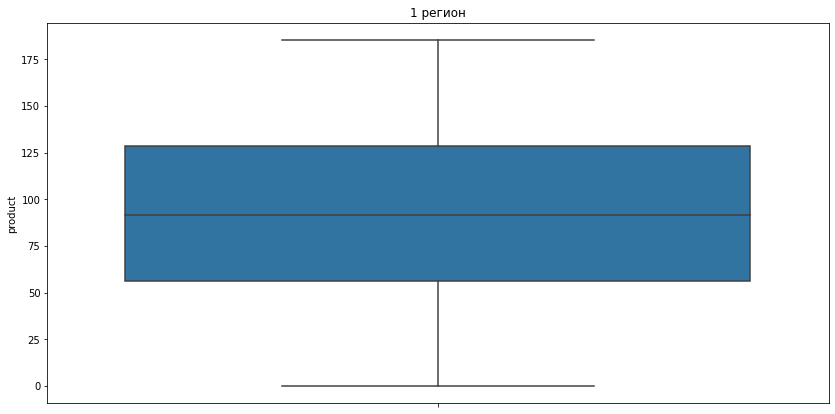

In [46]:
plt.subplots(figsize=(14, 7))
sns.boxplot(data=geo_data_0, y='product')
plt.title("1 регион")
plt.show()

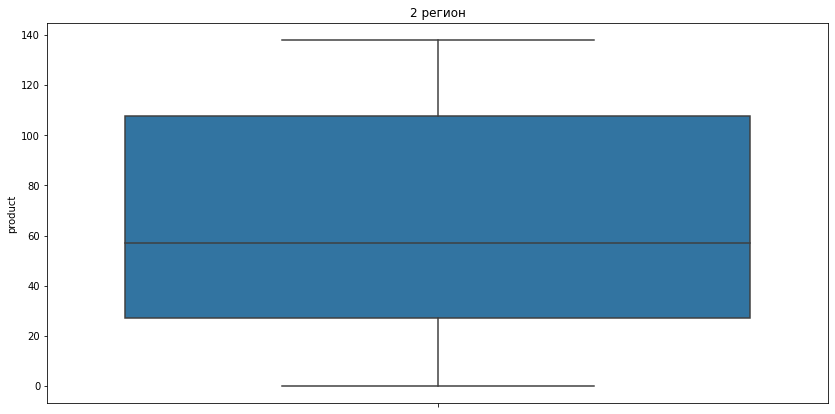

In [50]:
plt.subplots(figsize=(14, 7))
sns.boxplot(data=geo_data_1, y='product')
plt.title("2 регион")
plt.show()

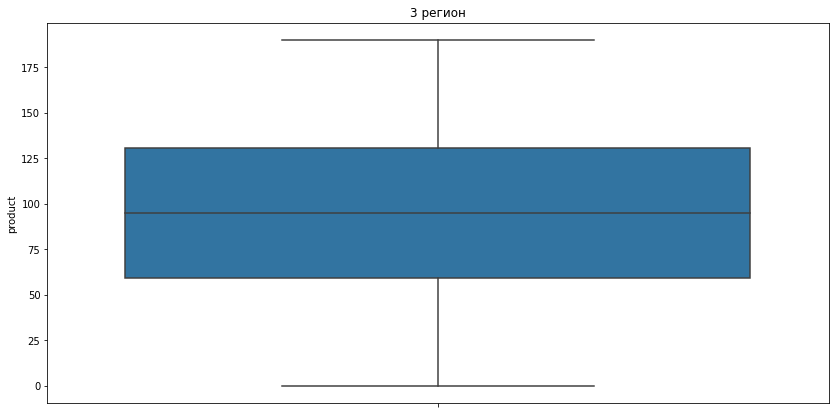

In [51]:
plt.subplots(figsize=(14, 7))
sns.boxplot(data=geo_data_2, y='product')
plt.title("3 регион")
plt.show()

Да странная корреляция по второму региону и распределение смещено вверх

## Обучение и проверка модели

В DataFrame содержится признак "id", который не окажет влияние на величину запасов. Разабьем таблицы отделив целевой признак "product" и удалив лишние признаки.

In [17]:
features_0 =geo_data_0.drop(['id', 'product'], axis = 1)
target_0 = geo_data_0['product']

features_1 =geo_data_1.drop(['id', 'product'], axis = 1)
target_1 = geo_data_1['product']

features_2 =geo_data_2.drop(['id', 'product'], axis = 1)
target_2 = geo_data_2['product']

Разделим DF на тренировочные и валидационные выборки.

In [18]:
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

Стандартизируем признаки

In [19]:
numeric = ['f0','f1','f2']
scaler = StandardScaler()

In [20]:
scaler.fit(features_0_train[numeric]) 
features_0_train[numeric] = scaler.transform(features_0_train[numeric]) 
features_0_valid[numeric] = scaler.transform(features_0_valid[numeric])
pd.options.mode.chained_assignment = None

/tmp/ipykernel_78/3175687323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_0_train[numeric] = scaler.transform(features_0_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [21]:
scaler.fit(features_1_train[numeric]) 
features_1_train[numeric] = scaler.transform(features_1_train[numeric]) 
features_1_valid[numeric] = scaler.transform(features_1_valid[numeric])

In [22]:
scaler.fit(features_2_train[numeric]) 
features_2_train[numeric] = scaler.transform(features_2_train[numeric]) 
features_2_valid[numeric] = scaler.transform(features_2_valid[numeric])

In [23]:
model = LinearRegression()

Обучим модели Линейной регрессии, передав им тренировочные выборки, затем расчитаем RMSE на основе валидационной

In [24]:
model.fit(features_0_train, target_0_train)
predicted_0_valid = model.predict(features_0_valid)
print('первый регион')
print('rmse = ', rmse_0 := mean_squared_error(target_0_valid, predicted_0_valid) **.5)
print('среднее = ', mean_squared_error(
    target_0_valid, pd.Series(target_0_train.mean(), index = target_0_valid.index))**.5)

первый регион
rmse =  37.853527328872964
среднее =  44.379313806074194


Это типо проверки адекватности модели

In [25]:
model.fit(features_1_train, target_1_train)
predicted_1_valid = model.predict(features_1_valid)
print('второй регион')
print('rmse = ', rmse_1 := mean_squared_error(target_1_valid, predicted_1_valid)**.5)
print('среднее = ', mean_squared_error(
    target_1_valid, pd.Series(target_1_train.mean(), index = target_1_valid.index))**.5)

второй регион
rmse =  0.8920592647717033
среднее =  45.903263550206404


In [26]:
model.fit(features_2_train, target_2_train)
predicted_2_valid = model.predict(features_2_valid)
print('первый регион')
print('rmse = ', rmse_2 := mean_squared_error(target_2_valid, predicted_2_valid)**.5)
print('среднее = ', mean_squared_error(
    target_2_valid, pd.Series(target_2_train.mean(), index = target_2_valid.index))**.5)

первый регион
rmse =  40.07585073246016
среднее =  44.68331298360565


Модель для второго региона отличается большей точностью.

## Подготовка к расчёту прибыли

In [27]:
INCOME_FOR_UNIT = 450000 
INVESTMENS = 10*10**9
POINT_RESERCH = 500
POINT_USE = 200

predicted_0_valid = pd.Series(
       predicted_0_valid, index = target_0_valid.index)
predicted_1_valid = pd.Series(
       predicted_1_valid, index = target_1_valid.index)
predicted_2_valid = pd.Series(
       predicted_2_valid, index = target_2_valid.index)

In [28]:
print(min_barrel := INVESTMENS / (INCOME_FOR_UNIT * POINT_USE))

111.11111111111111


Прибыль одного барреля нефти составит 450 рублей, для разработки месторождения выделены инвестиции в размере 10 млрд. рублей, тогда исходя из формулы возрата ивестиций ((прибыль - инвестиции)/инвестиции)) минимальный объем добываемого с одной скважены топлива должен составить не менее 111.1 тыс. баррелей нефти

In [29]:
print(min_barrel <= target_0.mean())
print(target_0.mean())

False
92.49968421774354


In [30]:
print(min_barrel <= target_1.mean())
print(target_1.mean())

False
68.82391591804064


In [31]:
print(min_barrel <= target_2.mean())
print(target_2.mean())

False
94.99834211933378


Как видим средний объем скважин во всех трех регионах ниже минимального значения, необходимого для возврата инвестиции. Разработка всех скважин в текущих условиях не рентабельна

## Расчёт прибыли и рисков 

Учитывая, что мы будем изучать только 500 скважен и из них разрабатывать "200 самых богатых", напишим функцию для расчета прибыли

In [32]:
def income(predicted, target, max_i):
    pred_sorted = predicted.sort_values(ascending = False)
    return target[pred_sorted.index][0:max_i].sum() * INCOME_FOR_UNIT - INVESTMENS

Ну я так понял 450 р за баррель это уже прибыль и не стал изначально включать инвестиции

In [33]:
print('расчет прибыли по 1-ому району:', income(predicted_0_valid, target_0_valid, POINT_USE))
print('расчет прибыли по 2-ому району:', income(predicted_1_valid, target_1_valid, POINT_USE))
print('расчет прибыли по 3-ему району:', income(predicted_2_valid, target_2_valid, POINT_USE))

расчет прибыли по 1-ому району: 3365187237.700287
расчет прибыли по 2-ому району: 2415086696.681511
расчет прибыли по 3-ему району: 2501283853.2820625


Очевидно, что самые богатые скважены находятся в 1 регионе, но исследовать все скважены мы не можем, поэтому используем предсказания наших моделей

In [34]:
state = np.random.RandomState(12345)
def confidence_interval_200(predicted, target):    
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = POINT_RESERCH, replace=True, random_state=state)
        probs_subsample = predicted[target_subsample.index]
        values.append(income(probs_subsample,  target_subsample, POINT_USE))
    return values

In [35]:
confidence_interval_0 = confidence_interval_200(predicted_0_valid, target_0_valid)
print(f"Средняя выручка по 1 региону: {sum(confidence_interval_0)/len(confidence_interval_0)}")
print(f"5% квантиль по 1 региону: {pd.Series(confidence_interval_0).quantile(0.025)}")
print(f"95% квантиль по 1 региону: {pd.Series(confidence_interval_0).quantile(0.975)}")
print(f"Вероятность убытка на 1 регионе: {pd.Series(confidence_interval_0)[pd.Series(confidence_interval_0) <= 0].count()/len(confidence_interval_0)*100} %")

Средняя выручка по 1 региону: 409428038.6214359
5% квантиль по 1 региону: -131536028.70166382
95% квантиль по 1 региону: 944395582.7546725
Вероятность убытка на 1 регионе: 7.1 %


In [36]:
confidence_interval_1 = confidence_interval_200(predicted_1_valid, target_1_valid)
print(f"Средняя выручка по 2 региону: {sum(confidence_interval_1)/len(confidence_interval_1)}")
print(f"5% квантиль по 2 региону: {pd.Series(confidence_interval_1).quantile(0.025)}")
print(f"95% квантиль по 2 региону: {pd.Series(confidence_interval_1).quantile(0.975)}")
print(f"Вероятность убытка на 2 регионе: {pd.Series(confidence_interval_1)[pd.Series(confidence_interval_1) <= 0].count()/len(confidence_interval_1)*100} %")

Средняя выручка по 2 региону: 536400199.43510294
5% квантиль по 2 региону: 112954247.12370124
95% квантиль по 2 региону: 998504156.6468805
Вероятность убытка на 2 регионе: 0.3 %


In [37]:
confidence_interval_2 = confidence_interval_200(predicted_2_valid, target_2_valid)
print(f"Средняя выручка по 3 региону: {sum(confidence_interval_2)/len(confidence_interval_2)}")
print(f"5% квантиль по 3 региону: {pd.Series(confidence_interval_2).quantile(0.025)}")
print(f"95% квантиль по 3 региону: {pd.Series(confidence_interval_2).quantile(0.975)}")
print(f"Вероятность убытка на 3 регионе: {pd.Series(confidence_interval_2)[pd.Series(confidence_interval_2) <= 0].count()/len(confidence_interval_2)*100} %")

Средняя выручка по 3 региону: 339478034.1977996
5% квантиль по 3 региону: -224089221.7440758
95% квантиль по 3 региону: 847067587.6863929
Вероятность убытка на 3 регионе: 11.799999999999999 %


Исходя из проведенных исследований стоит остановить свой выбор на 2-ом регионе, где вы ше прибыль и ниже вероятность убытков, кроме того по второму региону нами была обучена более точная модель.